Group Number:  

        Student Names:                     Student IDs:

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-#A" data-toc-modified-id="Problem-#A-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem #A</a></span></li><li><span><a href="#Problem-#B" data-toc-modified-id="Problem-#B-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem #B</a></span></li><li><span><a href="#Rough/test-work-----will-not-be-graded" data-toc-modified-id="Rough/test-work-----will-not-be-graded-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Rough/test work  -- will not be graded</a></span></li></ul></div>

# Problem #A

In [260]:
#A-1
import numpy as np
import pandas as pd
df = pd.read_csv('/content/HW4Data1.csv', delimiter=',')
display(df.head())

,Application. ID,Age,Gender,Location,Parents Edu.,Siblings,RAM-1 Score,RAM-2 Score,HS Score,School Rank,SOP,Admission Status
0,Ref#12436,23 yrs,Male,Eastern,F,No,54,64,30%,Avg,2.5,No
1,Ref#22094,20 yrs,Female,Western,M+F,No,34,27,40%,Avg,1.5,No
2,Ref#39403,19 yrs,Female,Central,M+F,No,48,38,100%,High,2.5,Yes
3,Ref#43891,16 yrs,Male,Eastern,M+F,Yes,81,97,44%,Low,1.5,Yes
4,Ref#57083,19 yrs,Female,Eastern,M,No,56,67,78%,Low,2.5,No


In [261]:
print(df.shape)

(5000, 12)


In [262]:
print(df.notnull().any().sum())
print(df.notnull().sum())
print(df.select_dtypes(include=np.number)) 
print(df.select_dtypes(include=object))

12
Application. ID     5000
Age                 5000
Gender              5000
Location            5000
Parents Edu.        5000
Siblings            5000
RAM-1 Score         5000
RAM-2 Score         5000
HS Score            5000
School Rank         5000
SOP                 5000
Admission Status    5000
dtype: int64
      RAM-1 Score  RAM-2 Score  SOP
0              54           64  2.5
1              34           27  1.5
2              48           38  2.5
3              81           97  1.5
4              56           67  2.5
...           ...          ...  ...
4995           25           20  2.5
4996           59           70  1.5
4997           55           66  4.5
4998           54           64  3.0
4999           53           63  2.5

[5000 rows x 3 columns]
     Application. ID     Age  Gender  ... HS Score School Rank Admission Status
0          Ref#12436  23 yrs    Male  ...      30%         Avg               No
1          Ref#22094  20 yrs  Female  ...      40%         Avg     

In [263]:
#A-2
print(df.dtypes)


Application. ID      object
Age                  object
Gender               object
Location             object
Parents Edu.         object
Siblings             object
RAM-1 Score           int64
RAM-2 Score           int64
HS Score             object
School Rank          object
SOP                 float64
Admission Status     object
dtype: object


In [264]:
# HS Score and Age should be int, they are object
# Converting to int
df['HS Score'] = df['HS Score'].str.extract('(\d+)', expand=False)
df['Age'] = df['Age'].str.extract('(\d+)', expand=False)
df['HS Score'] = df['HS Score'].astype(int)
df['Age'] = df['Age'].astype(int)
print("After converting to int: ")
print(df.dtypes)
print(df['HS Score'])
print(df['Age'])

After converting to int: 
Application. ID      object
Age                   int64
Gender               object
Location             object
Parents Edu.         object
Siblings             object
RAM-1 Score           int64
RAM-2 Score           int64
HS Score              int64
School Rank          object
SOP                 float64
Admission Status     object
dtype: object
0        30
1        40
2       100
3        44
4        78
       ... 
4995     80
4996     70
4997     46
4998     65
4999     22
Name: HS Score, Length: 5000, dtype: int64
0       23
1       20
2       19
3       16
4       19
        ..
4995    20
4996    20
4997    17
4998    20
4999    15
Name: Age, Length: 5000, dtype: int64


In [265]:
#A-3
df.drop('Application. ID', axis=1, inplace=True)
print(df.head())

   Age  Gender Location  ... School Rank  SOP  Admission Status
0   23    Male  Eastern  ...         Avg  2.5                No
1   20  Female  Western  ...         Avg  1.5                No
2   19  Female  Central  ...        High  2.5               Yes
3   16    Male  Eastern  ...         Low  1.5               Yes
4   19  Female  Eastern  ...         Low  2.5                No

[5 rows x 11 columns]


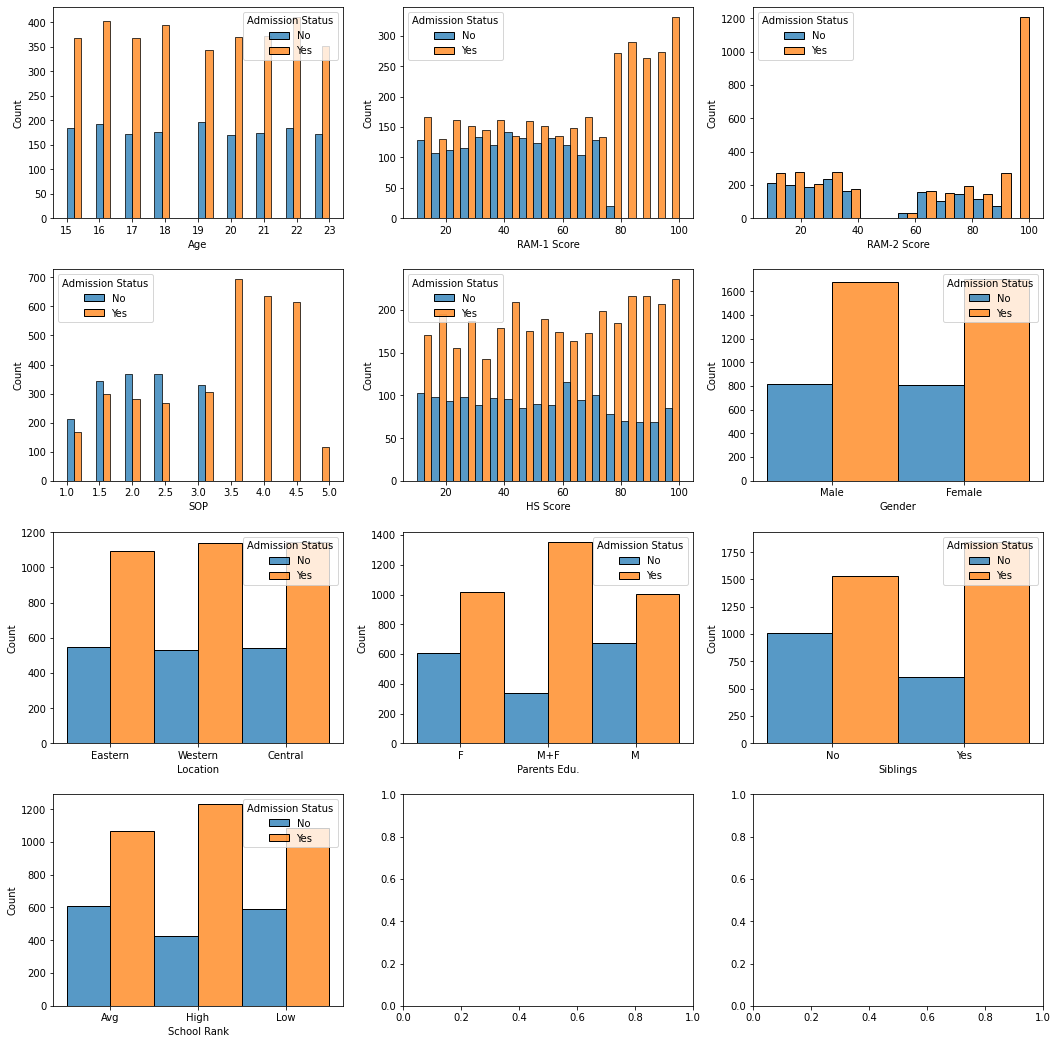

In [266]:
#A-4
from matplotlib import pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(4, 3, figsize=(15,15), sharey=False, sharex=False)
fig.tight_layout(pad=3.0)

# Numeric Columns
sns.histplot(data=df, x="Age", hue="Admission Status", multiple="dodge", ax=axes[0,0])
sns.histplot(data=df, x="RAM-1 Score", hue="Admission Status", multiple="dodge", ax=axes[0,1])
sns.histplot(data=df, x="RAM-2 Score", hue="Admission Status", multiple="dodge", ax=axes[0,2])
sns.histplot(data=df, x="SOP", hue="Admission Status", multiple="dodge", ax=axes[1,0])
sns.histplot(data=df, x="HS Score", hue="Admission Status", multiple="dodge", ax=axes[1,1])

# Non_Numeric Columns
sns.histplot(data=df, x="Gender", hue="Admission Status", multiple="dodge", ax=axes[1,2])
sns.histplot(data=df, x="Location", hue="Admission Status", multiple="dodge", ax=axes[2,0])
sns.histplot(data=df, x="Parents Edu.", hue="Admission Status", multiple="dodge", ax=axes[2,1])
sns.histplot(data=df, x="Siblings", hue="Admission Status", multiple="dodge", ax=axes[2,2])
sns.histplot(data=df, x="School Rank", hue="Admission Status", multiple="dodge", ax=axes[3,0])


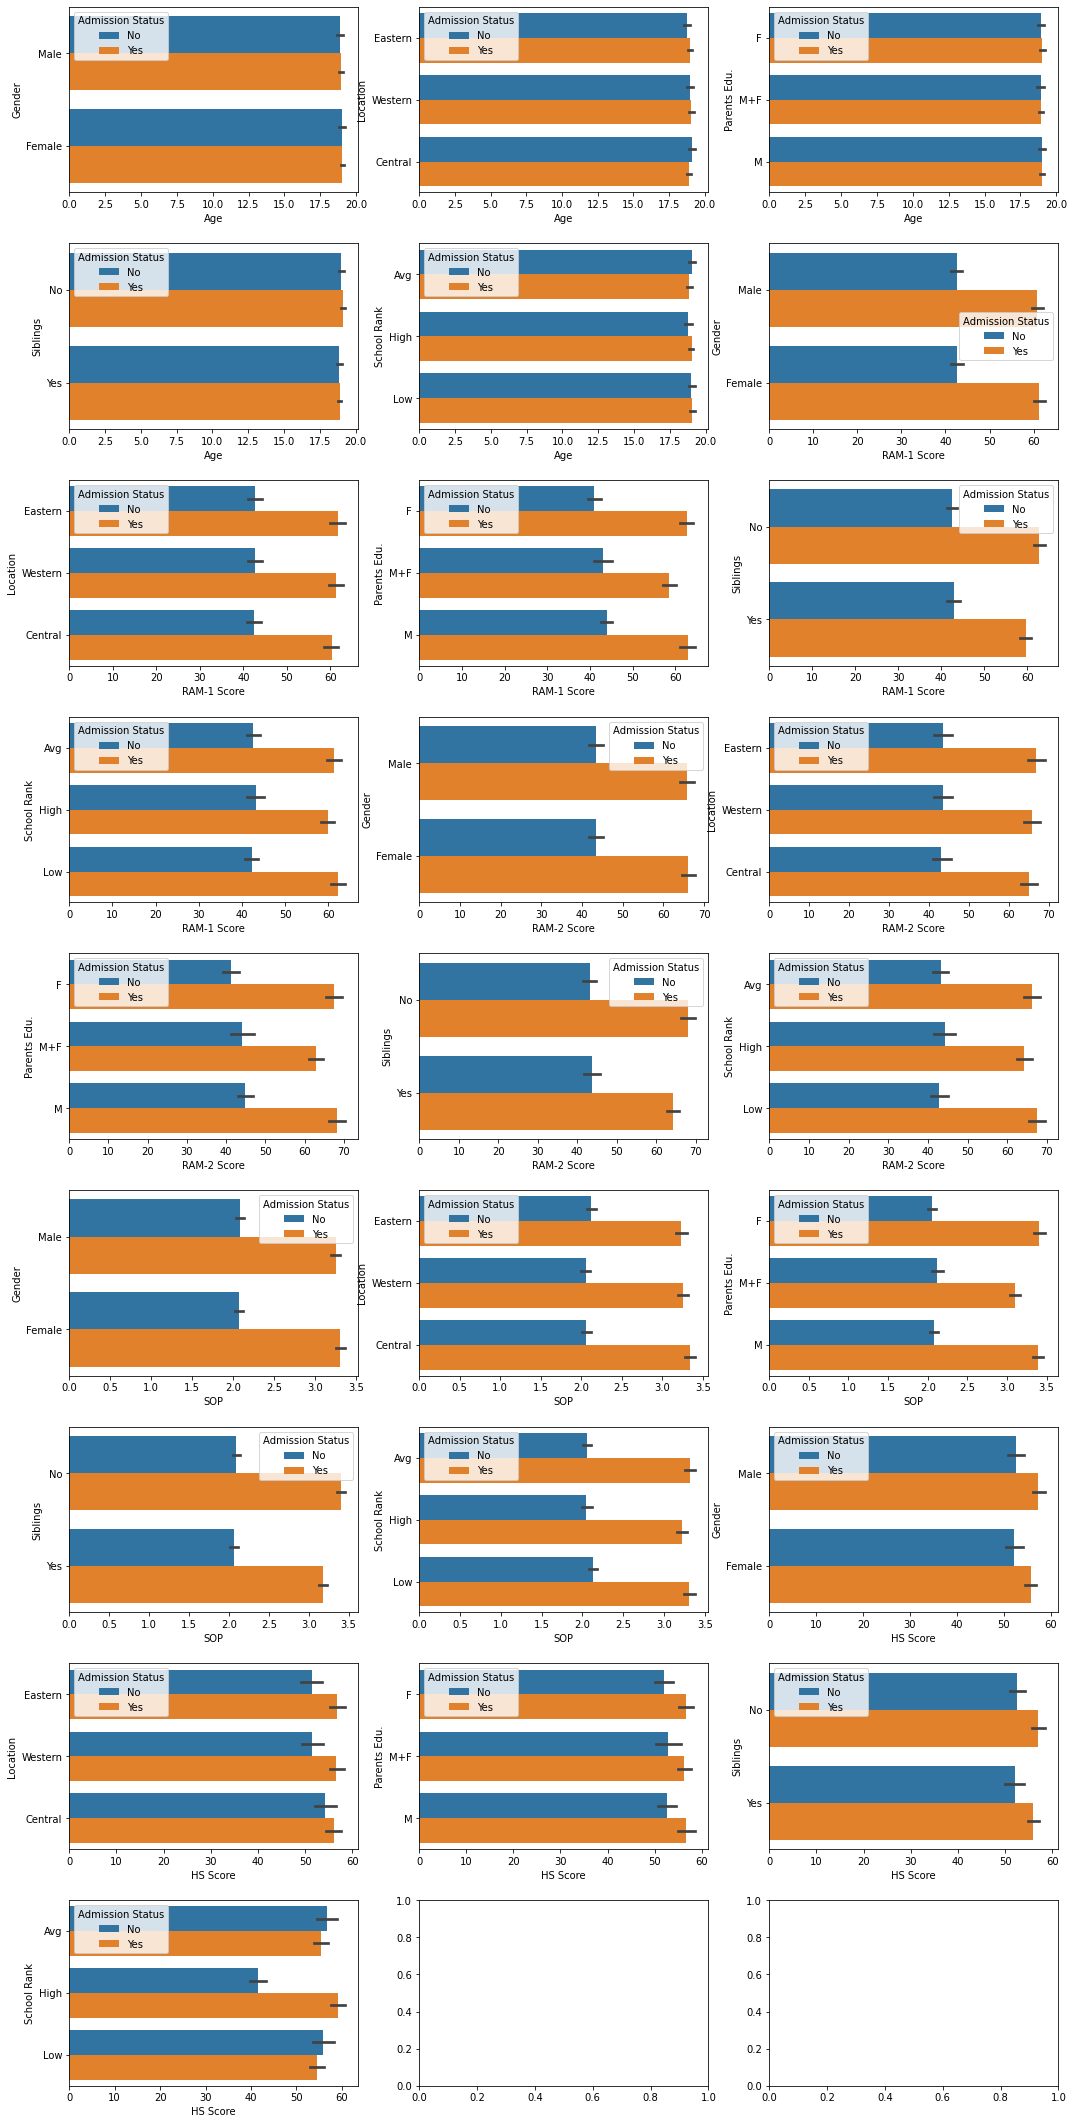

In [267]:
# Depict Each Combination
fig, axes = plt.subplots(9, 3, figsize=(15,30), sharey=False, sharex=False)
fig.tight_layout(pad=3.0)

sns.barplot(data=df, x="Age", y="Gender", hue="Admission Status", ax=axes[0,0])
sns.barplot(data=df, x="Age", y="Location", hue="Admission Status", ax=axes[0,1])
sns.barplot(data=df, x="Age", y="Parents Edu.", hue="Admission Status", ax=axes[0,2])
sns.barplot(data=df, x="Age", y="Siblings", hue="Admission Status", ax=axes[1,0])
sns.barplot(data=df, x="Age", y="School Rank", hue="Admission Status", ax=axes[1,1])

sns.barplot(data=df, x="RAM-1 Score", y="Gender", hue="Admission Status", ax=axes[1,2])
sns.barplot(data=df, x="RAM-1 Score", y="Location", hue="Admission Status", ax=axes[2,0])
sns.barplot(data=df, x="RAM-1 Score", y="Parents Edu.", hue="Admission Status", ax=axes[2,1])
sns.barplot(data=df, x="RAM-1 Score", y="Siblings", hue="Admission Status", ax=axes[2,2])
sns.barplot(data=df, x="RAM-1 Score", y="School Rank", hue="Admission Status", ax=axes[3,0])

sns.barplot(data=df, x="RAM-2 Score", y="Gender", hue="Admission Status", ax=axes[3,1])
sns.barplot(data=df, x="RAM-2 Score", y="Location", hue="Admission Status", ax=axes[3,2])
sns.barplot(data=df, x="RAM-2 Score", y="Parents Edu.", hue="Admission Status", ax=axes[4,0])
sns.barplot(data=df, x="RAM-2 Score", y="Siblings", hue="Admission Status", ax=axes[4,1])
sns.barplot(data=df, x="RAM-2 Score", y="School Rank", hue="Admission Status", ax=axes[4,2])

sns.barplot(data=df, x="SOP", y="Gender", hue="Admission Status", ax=axes[5,0])
sns.barplot(data=df, x="SOP", y="Location", hue="Admission Status", ax=axes[5,1])
sns.barplot(data=df, x="SOP", y="Parents Edu.", hue="Admission Status", ax=axes[5,2])
sns.barplot(data=df, x="SOP", y="Siblings", hue="Admission Status", ax=axes[6,0])
sns.barplot(data=df, x="SOP", y="School Rank", hue="Admission Status", ax=axes[6,1])

sns.barplot(data=df, x="HS Score", y="Gender", hue="Admission Status", ax=axes[6,2])
sns.barplot(data=df, x="HS Score", y="Location", hue="Admission Status", ax=axes[7,0])
sns.barplot(data=df, x="HS Score", y="Parents Edu.", hue="Admission Status", ax=axes[7,1])
sns.barplot(data=df, x="HS Score", y="Siblings", hue="Admission Status", ax=axes[7,2])
sns.barplot(data=df, x="HS Score", y="School Rank", hue="Admission Status", ax=axes[8,0])

In [268]:
#A-5
# Records
df1 = df.groupby(["Gender", "Location"]).size().reset_index(name="Times")
print("Max Records: ")
display(df1[df1['Times']==df1['Times'].max()])
print("\nMin Records: ")
display(df1[df1['Times']==df1['Times'].min()])



Max Records: 


,Gender,Location,Times
0,Female,Central,880



Min Records: 


,Gender,Location,Times
1,Female,Eastern,806


In [269]:
# Applicants
df2 = df[['Gender', 'Location', 'Admission Status']].copy()
df3 = df2.loc[df2['Admission Status'] == 'Yes']
df4 = df3.groupby(["Gender", "Location"]).size().reset_index(name="Count")
print("Max Admissions: ")
display(df4[df4['Count']==df4['Count'].max()])
print("\nMin Admissions: ")
display(df4[df4['Count']==df4['Count'].min()])

Max Admissions: 


,Gender,Location,Count
0,Female,Central,597



Min Admissions: 


,Gender,Location,Count
1,Female,Eastern,535


In [270]:
# Average
df5 = df[['Parents Edu.', 'School Rank', 'Siblings', 'Admission Status']].copy()
df6 = df5.loc[df5['Admission Status'] == 'Yes']
df7 = df6.groupby(["Parents Edu.", "School Rank", "Siblings"]).size().reset_index(name="Count")
print("Admissions for each combination: ")
df7

Admissions for each combination: 


,Parents Edu.,School Rank,Siblings,Count
0,F,Avg,No,162
1,F,Avg,Yes,150
2,F,High,No,192
3,F,High,Yes,195
4,F,Low,No,160
5,F,Low,Yes,159
6,M,Avg,No,160
7,M,Avg,Yes,153
8,M,High,No,198
9,M,High,Yes,188


In [271]:
#A-6
import warnings
warnings.filterwarnings('ignore')
# Binarize Siblings
df.Siblings[df.Siblings == 'Yes'] = 1
df.Siblings[df.Siblings == 'No'] = 0
df['Siblings'] = df['Siblings'].astype(int)
tmp = df['Siblings'].head(5)
tmp

0    0
1    0
2    0
3    1
4    0
Name: Siblings, dtype: int64

In [272]:
# One Hot Encoding 
df['Parents Edu.'] = pd.get_dummies(df['Parents Edu.'])
df.head(5)

,Age,Gender,Location,Parents Edu.,Siblings,RAM-1 Score,RAM-2 Score,HS Score,School Rank,SOP,Admission Status
0,23,Male,Eastern,1,0,54,64,30,Avg,2.5,No
1,20,Female,Western,0,0,34,27,40,Avg,1.5,No
2,19,Female,Central,0,0,48,38,100,High,2.5,Yes
3,16,Male,Eastern,0,1,81,97,44,Low,1.5,Yes
4,19,Female,Eastern,0,0,56,67,78,Low,2.5,No


In [273]:
# Converting School Rank Column
df.rename(columns={'School Rank': 'School_Rank'}, inplace=True)
df.School_Rank[df.School_Rank == 'Low'] = 1
df.School_Rank[df.School_Rank == 'Avg'] = 3
df.School_Rank[df.School_Rank == 'High'] = 5
df['School_Rank'] = df['School_Rank'].astype(int)
df['School_Rank'].head()

0    3
1    3
2    5
3    1
4    1
Name: School_Rank, dtype: int64

In [274]:
# Binarizing Admission Status
df.rename(columns={'Admission Status': 'Admission_Status'}, inplace=True)
df.Admission_Status[df.Admission_Status == 'Yes'] = 1
df.Admission_Status[df.Admission_Status == 'No'] = 0
df['Admission_Status'] = df['Admission_Status'].astype(int)
df['Admission_Status'].head()

0    0
1    0
2    1
3    1
4    0
Name: Admission_Status, dtype: int64

In [275]:
#A-7
# Correlation between all numeric columns
corr_df = df[['Age', 'Parents Edu.', 'Siblings', 'RAM-1 Score', 'RAM-2 Score', 'HS Score', 'School_Rank', 'SOP', 'Admission_Status']].copy()
corr_df = corr_df.corr()
corr_df

,Age,Parents Edu.,Siblings,RAM-1 Score,RAM-2 Score,HS Score,School_Rank,SOP,Admission_Status
Age,1.000000,0.003405,-0.037130,-0.005584,-0.010108,-0.014875,-0.015597,0.003948,0.005540
Parents Edu.,0.003405,1.000000,0.009915,-0.014128,-0.018903,-0.008510,0.009709,0.006626,-0.073437
Siblings,-0.037130,0.009915,1.000000,0.015241,0.015413,-0.004158,-0.001537,0.009290,0.160174
RAM-1 Score,-0.005584,-0.014128,0.015241,1.000000,0.979609,-0.020544,0.005801,-0.000925,0.329628
RAM-2 Score,-0.010108,-0.018903,0.015413,0.979609,1.000000,-0.018351,0.003879,-0.001370,0.315513
HS Score,-0.014875,-0.008510,-0.004158,-0.020544,-0.018351,1.000000,-0.004934,0.018837,0.073351
School_Rank,-0.015597,0.009709,-0.001537,0.005801,0.003879,-0.004934,1.000000,0.008681,0.081406
SOP,0.003948,0.006626,0.009290,-0.000925,-0.001370,0.018837,0.008681,1.000000,0.497300
Admission_Status,0.005540,-0.073437,0.160174,0.329628,0.315513,0.073351,0.081406,0.497300,1.000000


In [276]:
# Top 3 Correlated Variables
df8 = corr_df.nlargest(3, 'Admission_Status')
df9 = df8[['Admission_Status']].copy()
df9

,Admission_Status
Admission_Status,1.000000
SOP,0.497300
RAM-1 Score,0.329628


# Problem #B

In [1]:
#B-1
import pandas as pd
df = pd.read_csv('HW4Data2.csv', delimiter =',')
display(df)
print(f'The number of rows are {len(df.index)}, and the number of columns are {len(df.columns)}')

print(f'The number of missing data for each column are:\n{df.isna().sum()}')
nc=df.select_dtypes(exclude='object').columns
oc=df.select_dtypes('object').columns
df[oc].describe()
df[nc].describe()

,Gender,Location,Quiz-1,Quiz-2,Quiz-3,Quiz-4,Major-1,Major-2,Major-3,Final
0,Male,Jeddah,17,17,24,16,100,92,85,86
1,Female,Jeddah,10,21,14,8,16,28,17,25
2,Female,Jeddah,7,21,23,7,55,45,41,43
3,Male,Dammam,22,10,21,12,80,70,67,68
4,Female,Dammam,21,15,17,18,81,79,78,81
...,...,...,...,...,...,...,...,...,...,...
3495,Female,Riyadh,15,25,20,15,87,93,89,81
3496,Male,Dammam,15,14,17,8,48,45,46,43
3497,Male,Riyadh,20,23,20,18,71,77,82,73
3498,Female,Riyadh,10,16,6,12,63,68,49,60


The number of rows are 3500, and the number of columns are 10
The number of missing data for each column are:
Gender      0
Location    0
Quiz-1      0
Quiz-2      0
Quiz-3      0
Quiz-4      0
Major-1     0
Major-2     0
Major-3     0
Final       0
dtype: int64


,Quiz-1,Quiz-2,Quiz-3,Quiz-4,Major-1,Major-2,Major-3,Final
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,12.414571,14.814857,14.924286,12.523714,55.954571,55.949143,56.154286,54.019714
std,5.618516,6.001572,6.094121,5.612041,21.552887,21.734182,21.803054,21.418980
min,0.000000,5.000000,5.000000,0.000000,12.000000,12.000000,12.000000,8.000000
25%,8.000000,10.000000,10.000000,8.000000,38.000000,38.000000,38.000000,36.000000
50%,12.000000,15.000000,15.000000,13.000000,56.000000,56.000000,56.000000,54.000000
75%,17.000000,20.000000,20.000000,17.000000,74.000000,74.000000,74.000000,72.000000
max,25.000000,25.000000,25.000000,25.000000,100.000000,100.000000,100.000000,100.000000


In [2]:
#B-2
df.info()
#the data types are correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Gender    3500 non-null   object
 1   Location  3500 non-null   object
 2   Quiz-1    3500 non-null   int64 
 3   Quiz-2    3500 non-null   int64 
 4   Quiz-3    3500 non-null   int64 
 5   Quiz-4    3500 non-null   int64 
 6   Major-1   3500 non-null   int64 
 7   Major-2   3500 non-null   int64 
 8   Major-3   3500 non-null   int64 
 9   Final     3500 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 273.6+ KB


In [3]:
#B-3
from sklearn.preprocessing import StandardScaler
col_names = ['Quiz-1','Quiz-2','Quiz-3','Quiz-4','Major-1','Major-2','Major-3','Final']
features = df[col_names]

scaler = StandardScaler().fit(features.values)

df[col_names] = scaler.transform(features.values)



display(df[col_names])


,Quiz-1,Quiz-2,Quiz-3,Quiz-4,Major-1,Major-2,Major-3,Final
0,0.816245,0.364147,1.489470,0.619522,2.043890,1.658954,1.323202,1.493295
1,-0.429814,1.030734,-0.151690,-0.806188,-1.854057,-1.286137,-1.796073,-1.355053
2,-0.963839,1.030734,1.325354,-0.984402,-0.044296,-0.503847,-0.695153,-0.514557
3,1.706287,-0.802381,0.997122,-0.093333,1.115807,0.646579,0.497511,0.652799
4,1.528278,0.030853,0.340658,0.975949,1.162211,1.060732,1.002100,1.259824
...,...,...,...,...,...,...,...,...
3495,0.460228,1.697322,0.833006,0.441308,1.440636,1.704971,1.506688,1.259824
3496,0.460228,-0.135793,0.340658,-0.806188,-0.369125,-0.503847,-0.465794,-0.514557
3497,1.350270,1.364028,0.833006,0.975949,0.698170,0.968698,1.185587,0.886270
3498,-0.429814,0.197500,-1.464618,-0.093333,0.326937,0.554545,-0.328179,0.279245


<Figure size 432x288 with 0 Axes>

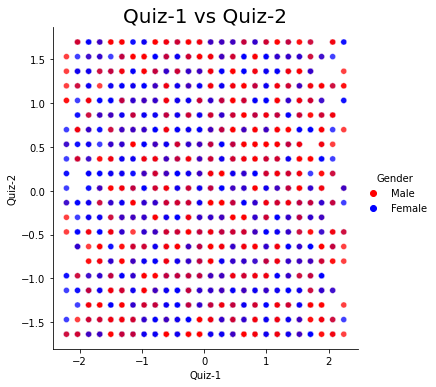

<Figure size 432x288 with 0 Axes>

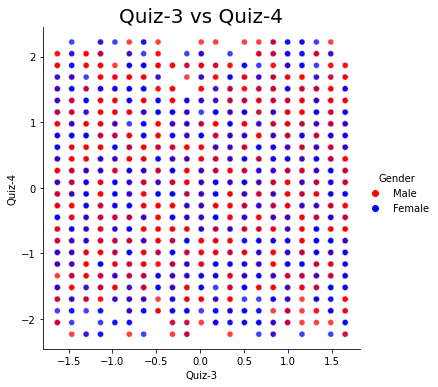

<Figure size 432x288 with 0 Axes>

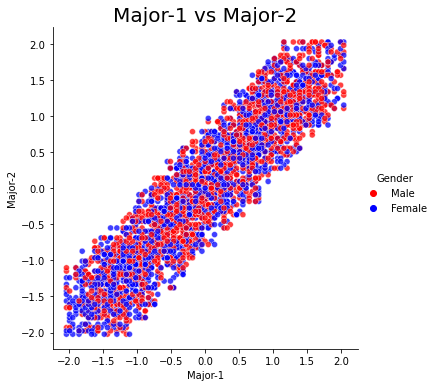

<Figure size 432x288 with 0 Axes>

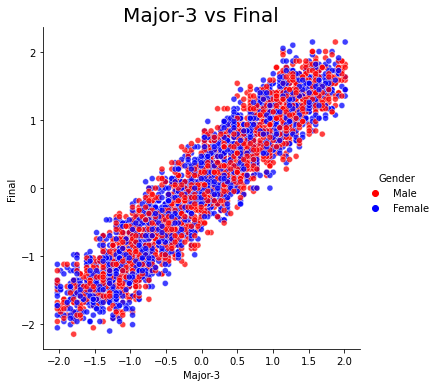

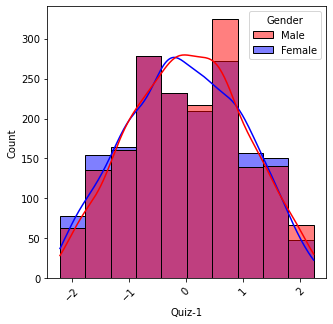

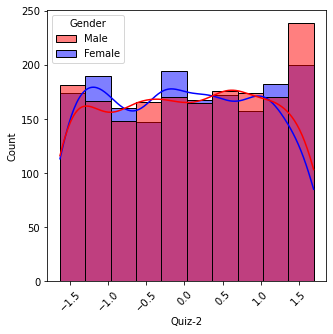

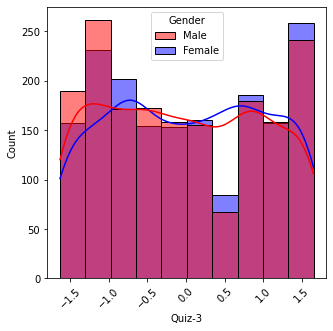

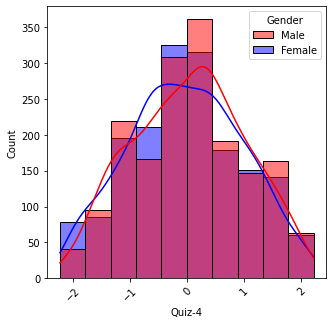

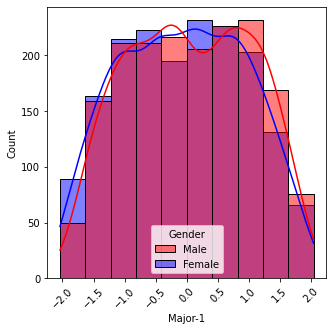

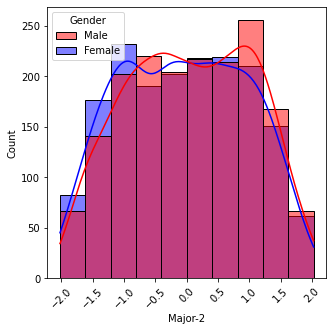

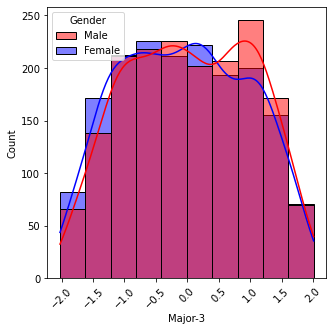

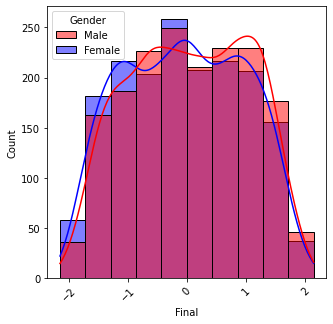

In [12]:
#B-4
import matplotlib.pyplot as plt
import seaborn as sns
col_names = ['Quiz-1','Quiz-2','Quiz-3','Quiz-4','Major-1','Major-2','Major-3','Final']
plt.figure()
sns.relplot(x='Quiz-1',y='Quiz-2',
            hue='Gender', palette=['r','b'],
            kind='scatter',alpha=0.75,
            height=5, aspect=1,
            data=df)
plt.title('Quiz-1 vs Quiz-2', fontsize = 20)
plt.show()

plt.figure()
sns.relplot(x='Quiz-3',y='Quiz-4',
            hue='Gender', palette=['r','b'],
            kind='scatter',alpha=0.75,
            height=5, aspect=1,
            data=df)
plt.title('Quiz-3 vs Quiz-4', fontsize = 20)
plt.show()

plt.figure()
sns.relplot(x='Major-1',y='Major-2',
            hue='Gender', palette=['r','b'],
            kind='scatter',alpha=0.75,
            height=5, aspect=1,
            data=df)
plt.title('Major-1 vs Major-2', fontsize = 20)
plt.show()

plt.figure()
sns.relplot(x='Major-3',y='Final',
            hue='Gender', palette=['r','b'],
            kind='scatter',alpha=0.75,
            height=5, aspect=1,
            data=df)
plt.title('Major-3 vs Final', fontsize = 20)
plt.show()

for col in col_names:
    plt.figure(figsize=(5,5))
    sns.histplot(x=col,bins=10,hue='Gender',kde=True,data=df,palette=['r','b'])
    plt.xticks(rotation=45)
    plt.show()

In [14]:
#B-5
col_names = ['Quiz-1','Quiz-2','Quiz-3','Quiz-4','Major-1','Major-2','Major-3','Final']
corr = df[col_names].corr()
display(corr)
# the top 3 variables that are highly correlated with 'Final' score column are Major-1 and Major-2 and Major-3
# the pair of score columns that are strongly correlated are Major-2 and Final

,Quiz-1,Quiz-2,Quiz-3,Quiz-4,Major-1,Major-2,Major-3,Final
Quiz-1,1.000000,-0.019810,-0.014291,0.682592,0.790215,0.790874,0.789688,0.838695
Quiz-2,-0.019810,1.000000,-0.003306,-0.021923,-0.025164,-0.021010,-0.023346,-0.026549
Quiz-3,-0.014291,-0.003306,1.000000,-0.019096,-0.023358,-0.032447,-0.029954,-0.026751
Quiz-4,0.682592,-0.021923,-0.019096,1.000000,0.794112,0.798142,0.790277,0.876668
Major-1,0.790215,-0.025164,-0.023358,0.794112,1.000000,0.921456,0.920826,0.961379
Major-2,0.790874,-0.021010,-0.032447,0.798142,0.921456,1.000000,0.926736,0.970803
Major-3,0.789688,-0.023346,-0.029954,0.790277,0.920826,0.926736,1.000000,0.938199
Final,0.838695,-0.026549,-0.026751,0.876668,0.961379,0.970803,0.938199,1.000000


,Gender,Location,Quiz-1,Quiz-2,Quiz-3,Quiz-4,Major-1,Major-2,Major-3,Final,pca1,pca2
0,Male,Jeddah,0.816245,0.364147,1.489470,0.619522,2.043890,1.658954,1.323202,1.493295,-3.266447,-0.799274
1,Female,Jeddah,-0.429814,1.030734,-0.151690,-0.806188,-1.854057,-1.286137,-1.796073,-1.355053,3.130178,0.827494
2,Female,Jeddah,-0.963839,1.030734,1.325354,-0.984402,-0.044296,-0.503847,-0.695153,-0.514557,1.513852,-0.212706
3,Male,Dammam,1.706287,-0.802381,0.997122,-0.093333,1.115807,0.646579,0.497511,0.652799,-1.832360,-1.280909
4,Female,Dammam,1.528278,0.030853,0.340658,0.975949,1.162211,1.060732,1.002100,1.259824,-2.837602,-0.226993
...,...,...,...,...,...,...,...,...,...,...,...,...
3495,Female,Riyadh,0.460228,1.697322,0.833006,0.441308,1.440636,1.704971,1.506688,1.259824,-2.798128,0.610921
3496,Male,Dammam,0.460228,-0.135793,0.340658,-0.806188,-0.369125,-0.503847,-0.465794,-0.514557,0.919364,-0.341905
3497,Male,Riyadh,1.350270,1.364028,0.833006,0.975949,0.698170,0.968698,1.185587,0.886270,-2.428023,0.363286
3498,Female,Riyadh,-0.429814,0.197500,-1.464618,-0.093333,0.326937,0.554545,-0.328179,0.279245,-0.173710,1.185296


<Figure size 432x288 with 0 Axes>

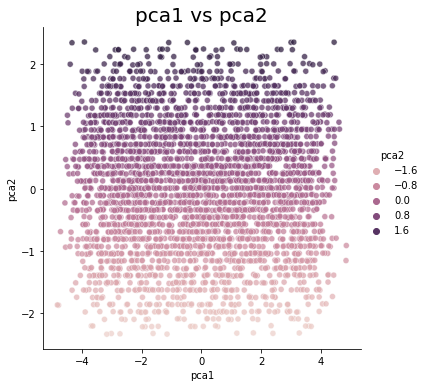

In [17]:
#B-6
from sklearn.decomposition import PCA
num_columns = df[col_names].columns
pca_input_columns=num_columns
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df[pca_input_columns])
df['pca1'] = principalComponents[:,0]
df['pca2'] = principalComponents[:,1]

display(df)

plt.figure()
sns.relplot(x='pca1',y='pca2',
            hue='economy', palette=['r','b','g'],
            kind='scatter',alpha=0.75,
            height=5, aspect=1,
            data=df)
plt.title('PCA vs Economy', fontsize = 20)
plt.show()


# Rough/test work  -- will not be graded

In [283]:
##  you can have extra cells here. None of the cells in this section will be graded.